# Abnormality detection in bone X-Ray Radiographs

 This notebook includes first two steps of the Data Science Method
* Data Wrangling 
* Exploratory Data Analysis

<font color = 'teal'>Data Wrangling <font />
*  Data wrangling includes collection, organisation, definition and cleaning of data 

<font color ='teal'>i. Data Collection <font />

Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import imageio

Dataset used in this project is called MURA. MURA is one of the largest public radiographic image datasets. MURA is a dataset of musculoskeletal radiographs consisting of 14,863 studies from 12,173 patients, with a total of 40,561 multi-view radiographic images.

In [2]:
#load the train image data into a pandas dataframe
train_image = pd.read_csv('train_image_paths.csv')

In [3]:
#print the first five rows of train_image dataframe 
train_image.head()

,train_image_paths
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...


In [4]:
#load the train label data into a pandas dataframe
train_labels = pd.read_csv('train_labeled_studies.csv')

In [5]:
#print first five rows of train_labels dataframe
train_labels.head()

,train_image_paths,Abnormal
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1
1,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1
2,MURA-v1.1/train/XR_SHOULDER/patient00003/study...,1
3,MURA-v1.1/train/XR_SHOULDER/patient00004/study...,1
4,MURA-v1.1/train/XR_SHOULDER/patient00005/study...,1


In [6]:
#load the test image data into a pandas dataframe valid_image
valid_image = pd.read_csv('valid_image_paths.csv')

In [7]:
#print the first five rows of valid_image dataframe 
valid_image.head()

,valid_image_paths
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
1,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
2,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
3,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...
4,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...


In [8]:
#load the test labels data into a pandas dataframe
valid_labels = pd.read_csv('valid_labeled_studies.csv')

In [9]:
#print first five rows of the dataframe valid_labels
valid_labels.head()

,valid_image_paths,Abnormal
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1
1,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,1
2,MURA-v1.1/valid/XR_WRIST/patient11186/study2_p...,1
3,MURA-v1.1/valid/XR_WRIST/patient11186/study3_p...,1
4,MURA-v1.1/valid/XR_WRIST/patient11187/study1_p...,1


<font color = 'teal'>ii Data Organisation<font />

**<font color='teal'> Print the current working directory </font>**

In [10]:
pwd

'C:\\Users\\user\\Springboard\\Course\\Capstone - 2\\MURA-v1.1'

In [11]:
os.listdir()

['.ipynb_checkpoints',
 'Capstone _3_Data_Wrangling_and_EDA.ipynb',
 'data',
 'figures',
 'models',
 'train',
 'train_image_paths.csv',
 'train_labeled_studies.csv',
 'valid',
 'valid_image_paths.csv',
 'valid_labeled_studies.csv']

<font color='teal'> **Create a subfolder called `data`.**</font>

In [12]:
os.mkdir('data') 

<font color='teal'> **Create a folder for the data visualizations you will create in future steps called `figures`.**</font>

In [13]:
os.mkdir('figures') 

<font color='teal'> **Create a folder for the models you save, called `models`.**</font>

In [14]:
os.mkdir('models') 

<font color='teal'> **Print the contents of your project folder to confirm you created the additional folders in your directory.**</font>

In [15]:
os.listdir()

['.ipynb_checkpoints',
 'Capstone _3_Data_Wrangling_and_EDA.ipynb',
 'data',
 'figures',
 'models',
 'train',
 'train_image_paths.csv',
 'train_labeled_studies.csv',
 'valid',
 'valid_image_paths.csv',
 'valid_labeled_studies.csv']

<font color ='teal'>iii. Data definition<font />

In [ ]:
# print the columns of all four dataframes

In [16]:
print("Train_image columns :",train_image.columns)
print("Train_labels columns :", train_labels.columns)
print("Valid_image columns :",valid_image.columns)
print("Valid_labels columns :",valid_labels.columns)

Train_image columns : Index(['train_image_paths'], dtype='object')
Train_labels columns : Index(['train_image_paths', 'Abnormal'], dtype='object')
Valid_image columns : Index(['valid_image_paths'], dtype='object')
Valid_labels columns : Index(['valid_image_paths', 'Abnormal'], dtype='object')


In [17]:
#print the shape of all dataframes

In [18]:
print("Train_image shape : ",train_image.shape)
print("Train_labels shape : ", train_labels.shape)
print("Valid_image shape : ",valid_image.shape)
print("Valid_labels shape : ",valid_labels.shape)

Train_image shape :  (36808, 1)
Train_labels shape :  (13457, 2)
Valid_image shape :  (3197, 1)
Valid_labels shape :  (1199, 2)


The `df.info()` function also prints the count of non-null values per column. Used this function to review the column names, null value counts and data types of your data frame.

In [19]:
print("Train_image info : ",train_image.info())
print("Train_labels info : ", train_labels.info())
print("Valid_image info : ",valid_image.info())
print("Valid_labels info : ",valid_labels.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36808 entries, 0 to 36807
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   train_image_paths  36808 non-null  object
dtypes: object(1)
memory usage: 287.7+ KB
Train_image info :  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13457 entries, 0 to 13456
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   train_image_paths  13457 non-null  object
 1   Abnormal           13457 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 210.4+ KB
Train_labels info :  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   valid_image_paths  3197 non-null   object
dtypes: object(1)
memory usage: 25.1+ KB
Valid_image info :  No

<font color = 'teal'>iv. Data cleaning <font />

In [20]:
train_image.isnull().values.any()

False

In [21]:
train_labels.isnull().values.any()

False

In [22]:
valid_image.isnull().values.any()

False

In [23]:
valid_labels.isnull().values.any()

False

We can see that there are no nan values in any of these dataframes. The datasets are relatively clean so there is no need of data cleaning.

<font color = 'teal'>Exploratory Data Analysis<font />

<font color ='teal'>Visualising abnormal bone X-Ray Radiographs <font />

In [24]:
Abnormal = train_labels[train_labels['Abnormal']==1]

In [25]:
Abnormal.head()

,train_image_paths,Abnormal
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1
1,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1
2,MURA-v1.1/train/XR_SHOULDER/patient00003/study...,1
3,MURA-v1.1/train/XR_SHOULDER/patient00004/study...,1
4,MURA-v1.1/train/XR_SHOULDER/patient00005/study...,1


Trying to visualize the image which path is available in first row of the dataframe.

In [28]:
path = "train/XR_SHOULDER/patient00001"
os.listdir(path)

['study1_positive']

In [29]:
path = "train/XR_SHOULDER/patient00001/study1_positive"
os.listdir(path)

['image1.png', 'image2.png', 'image3.png']

(-0.5, 511.5, 409.5, -0.5)

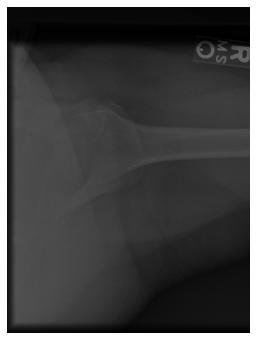

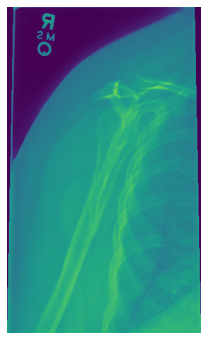

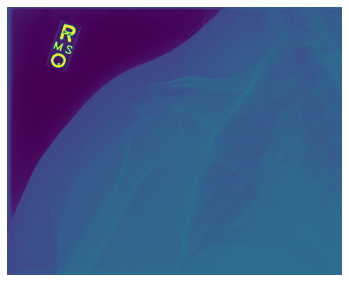

In [31]:
pic=imageio.imread('train/XR_SHOULDER/patient00001/study1_positive/image1.png')
plt.figure(figsize=(6,6))
plt.imshow(pic);
plt.axis('off')
pic=imageio.imread('train/XR_SHOULDER/patient00001/study1_positive/image2.png')
plt.figure(figsize=(6,6))
plt.imshow(pic);
plt.axis('off')
pic=imageio.imread('train/XR_SHOULDER/patient00001/study1_positive/image3.png')
plt.figure(figsize=(6,6))
plt.imshow(pic);
plt.axis('off')

<font color ='teal'>Visulaising normal bone X-Ray Radiographs <font />

In [32]:
Normal = train_labels[train_labels['Abnormal']==0]

In [41]:
Normal.head()

,train_image_paths,Abnormal
7,MURA-v1.1/train/XR_SHOULDER/patient00007/study...,0
53,MURA-v1.1/train/XR_SHOULDER/patient00051/study...,0
62,MURA-v1.1/train/XR_SHOULDER/patient00058/study...,0
81,MURA-v1.1/train/XR_SHOULDER/patient00074/study...,0
82,MURA-v1.1/train/XR_SHOULDER/patient00074/study...,0


Trying to visualize the image which path is available in first row of the dataframe.

In [34]:
path = "train/XR_SHOULDER/patient00007"
os.listdir(path)

['study1_positive', 'study2_negative']

In [36]:
path = "train/XR_SHOULDER/patient00007/study2_negative"
os.listdir(path)

['image1.png', 'image2.png', 'image3.png', 'image4.png']

(-0.5, 511.5, 356.5, -0.5)

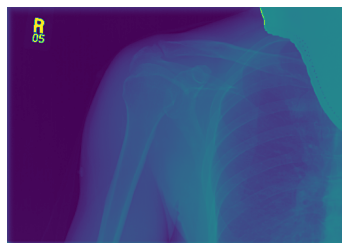

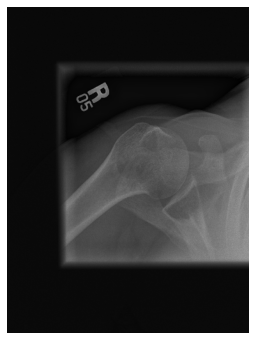

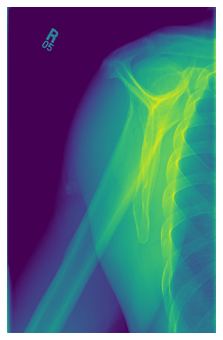

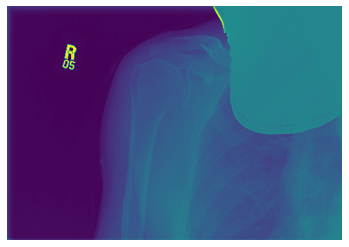

In [38]:
pic=imageio.imread('train/XR_SHOULDER/patient00007/study2_negative/image1.png')
plt.figure(figsize=(6,6))
plt.imshow(pic);
plt.axis('off')
pic=imageio.imread('train/XR_SHOULDER/patient00007/study2_negative/image2.png')
plt.figure(figsize=(6,6))
plt.imshow(pic);
plt.axis('off')
pic=imageio.imread('train/XR_SHOULDER/patient00007/study2_negative/image3.png')
plt.figure(figsize=(6,6))
plt.imshow(pic);
plt.axis('off')
pic=imageio.imread('train/XR_SHOULDER/patient00007/study2_negative/image4.png')
plt.figure(figsize=(6,6))
plt.imshow(pic);
plt.axis('off')